# Time Series Forescasting

In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

In [2]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')

sales = pd.read_csv('sales-cars.csv',index_col=0, parse_dates=[0] ,date_parser=parser)

In [3]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [4]:
sales.Month[1]

AttributeError: 'DataFrame' object has no attribute 'Month'

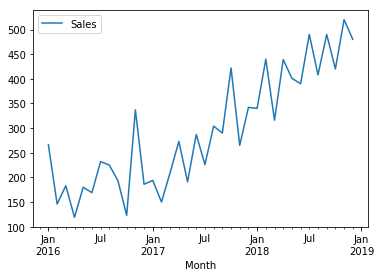

In [5]:
sales.plot()

Stationary means mean, variance and covariance is constant over periods.

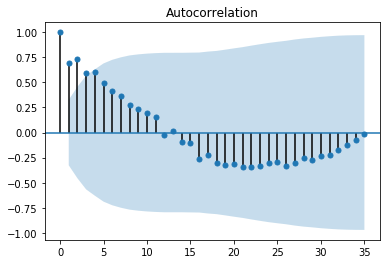

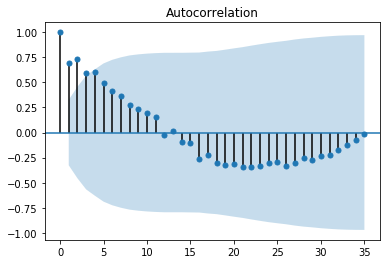

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

### Converting series to stationary

In [ ]:
sales.head()

In [ ]:
sales.shift(1)

In [ ]:
sales_diff = sales.diff(periods=1)
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model


In [ ]:
sales_diff = sales_diff[1:]
sales_diff.head()

In [ ]:
plot_acf(sales_diff)

In [ ]:
sales_diff.plot()

In [7]:
X = sales.values
train = X[0:27] # 27 data as train data
test = X[26:]  # 9 data as test data
predictions = []

In [11]:
sales.values

array([[266],
       [146],
       [183],
       [119],
       [180],
       [169],
       [232],
       [225],
       [193],
       [123],
       [337],
       [186],
       [194],
       [150],
       [210],
       [273],
       [191],
       [287],
       [226],
       [304],
       [290],
       [422],
       [265],
       [342],
       [340],
       [440],
       [316],
       [439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]])

# Autoreggresive AR Model

In [12]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [13]:
predictions = model_ar_fit.predict(start=26,end=36)

In [ ]:
test

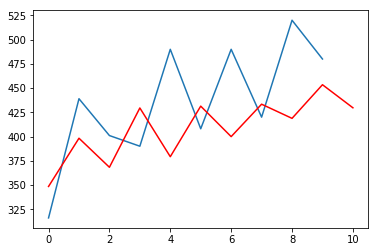

In [14]:
plt.plot(test)
plt.plot(predictions,color='red')

In [ ]:
sales.plot()

# ARIMA model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(9, 2, 0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

In [ ]:
predictions= model_arima_fit.forecast(steps=10)[0]
predictions

In [ ]:
plt.plot(test)
plt.plot(predictions,color='red')

In [15]:
mean_squared_error(test,predictions)

ValueError: Found input variables with inconsistent numbers of samples: [10, 11]

In [ ]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    